In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

In [2]:
voltages = np.arange(101,1001,1,dtype=int)

In [3]:
voltages2 = voltages/10
voltages2
len(voltages2)

900

In [4]:
readInData = pd.read_csv('Nov1_SinglePixelData.csv')
readInData

,b,d,converted,firstBit,secondBit,thirdBit,firstBitInvert,secondBitInvert,thirdBitInvert
0,101,240.000000,1.111000e+07,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
1,102,240.000000,1.111000e+07,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
2,103,239.991579,1.110999e+07,1.000000,1.000000,0.999474,0.000000,0.000000,0.000526
3,104,239.903158,1.110937e+07,0.999474,0.999211,0.997632,0.000526,0.000789,0.002368
4,105,239.966316,1.110971e+07,0.999737,0.999737,0.999474,0.000263,0.000263,0.000526
...,...,...,...,...,...,...,...,...,...
895,996,128.000000,1.000000e+07,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
896,997,128.000000,1.000000e+07,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
897,998,128.000000,1.000000e+07,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
898,999,128.000000,1.000000e+07,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'fraction')

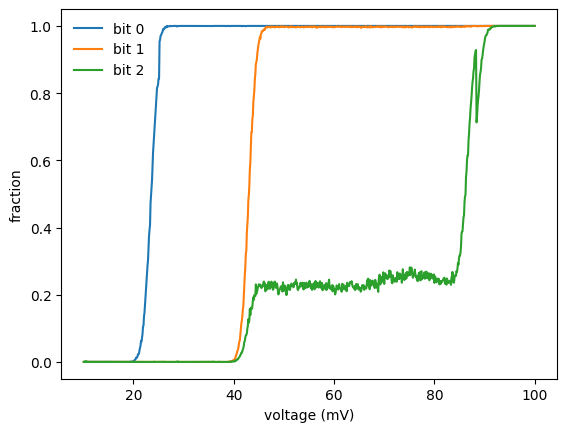

In [5]:
#ydata0 = readInData['firstBit'].to_numpy().flatten()
#ydata1 = readInData['secondtBit'].to_numpy().flatten()
#ydata2 = readInData['thirdBit'].to_numpy().flatten()
ydata0 = readInData['firstBitInvert'].to_numpy().flatten()
ydata1 = readInData['secondBitInvert'].to_numpy().flatten()
ydata2 = readInData['thirdBitInvert'].to_numpy().flatten()

plt.plot(voltages2,ydata0, label='bit 0')
plt.plot(voltages2,ydata1, label='bit 1')
plt.plot(voltages2,ydata2, label='bit 2')
plt.legend(loc='upper left',framealpha=0.0)
plt.xlabel('voltage (mV)')
plt.ylabel('fraction')

In [6]:
# The first parameter is the mean and the second is the stdev, so I set it to -inf to +inf for the mean and 0 to inf for the stdev.
#For the initial guess for the fit, you can adjust the p0 values (first value is the initial guess of the mean, second is guess for the standard deviation.
fitResult=curve_fit(f=norm.cdf, xdata=voltages2.flatten(), ydata=ydata0,p0=[10,1],bounds=((-np.inf,0),(np.inf,np.inf)))
mean_, std_=fitResult[0]
print(f"Mean {mean_:.4f}, StdDev {std_:.4f}")
print('Covariance matrix:')
print(fitResult[1])

Mean 23.5316, StdDev 1.2719
Covariance matrix:
[[ 8.68277819e-06 -1.15854267e-12]
 [-1.15854267e-12  1.73655566e-05]]


In [7]:
fitResult=curve_fit(f=norm.cdf, xdata=voltages2.flatten(), ydata=ydata1,p0=[10,1],bounds=((-np.inf,0),(np.inf,np.inf)))
mean_, std_=fitResult[0]
print(f"Mean {mean_:.4f}, StdDev {std_:.4f}")
print('Covariance matrix:')
print(fitResult[1])

Mean 42.9957, StdDev 1.2126
Covariance matrix:
[[ 2.86376729e-06 -7.67531945e-13]
 [-7.67531945e-13  5.72753458e-06]]


In [8]:
fitResult=curve_fit(f=norm.cdf, xdata=voltages2.flatten(), ydata=ydata2, p0=[10,1],bounds=((-np.inf,0),(np.inf,np.inf)))
mean_, std_=fitResult[0]
print(f"Mean {mean_:.4f}, StdDev {std_:.4f}")
print('Covariance matrix:')
print(fitResult[1])

Mean 80.6114, StdDev 17.2707
Covariance matrix:
[[0.12791517 0.02656461]
 [0.02656461 0.31562899]]
